In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [1]:
#Lectura de Assay
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving assay.csv to assay.csv
User uploaded file "assay.csv" with length 46649 bytes


In [5]:
#Lectura de collar
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving collar.csv to collar.csv
User uploaded file "collar.csv" with length 1751 bytes


In [3]:
#Transformación de assay y collar a dataframe
df = pd.read_csv('assay.csv')
df2 = pd.read_csv('collar.csv')

In [5]:
df2 = df2.rename(columns={'DH-ID': 'bhid'})

In [6]:
fig = px.scatter_3d(df2, x='X', y='Y', z='Z')
fig.show()

In [7]:
df3 = pd.merge(df,df2,how='inner',on='bhid',validate='many_to_many')
df3

,bhid,from,to,gold,copper,litho,X,Y,Z,LENGHT
0,DDFD_A7,16.10,118.36,-99.00,-99.00,MB,2127.00,2005.53,1116.966,248.14
1,DDFD_A7,118.36,144.72,-99.00,-99.00,BP,2127.00,2005.53,1116.966,248.14
2,DDFD_A7,144.72,145.73,1.55,2.56,SP,2127.00,2005.53,1116.966,248.14
3,DDFD_A7,145.73,146.74,3.93,6.48,SP,2127.00,2005.53,1116.966,248.14
4,DDFD_A7,146.74,147.75,1.37,2.26,SP,2127.00,2005.53,1116.966,248.14
...,...,...,...,...,...,...,...,...,...,...
1442,RCFD_Z2,78.00,79.00,2.06,3.40,SP,2106.89,1821.45,1139.403,85.00
1443,RCFD_Z2,79.00,80.00,2.15,3.55,SP,2106.89,1821.45,1139.403,85.00
1444,RCFD_Z2,80.00,81.00,1.40,2.31,SP,2106.89,1821.45,1139.403,85.00
1445,RCFD_Z2,81.00,82.00,1.59,2.62,SP,2106.89,1821.45,1139.403,85.00


In [8]:
df3.describe()

,from,to,gold,copper,X,Y,Z,LENGHT
count,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000
mean,100.176856,104.135363,-5.771458,-3.919261,1995.358590,2025.985577,1134.739601,140.093663
std,72.681052,72.639772,28.964731,29.805555,101.352534,133.337198,14.918763,81.224727
min,0.000000,1.000000,-99.000000,-99.000000,1803.000000,1798.610000,1102.956000,16.000000
25%,42.000000,46.000000,0.750000,1.240000,1902.500000,1904.960000,1127.151000,77.000000
50%,84.000000,89.610000,2.040000,3.370000,2004.800000,2026.270000,1136.536000,119.780000
75%,161.915000,164.675000,4.070000,6.720000,2080.430000,2142.000000,1147.582000,205.450000
max,345.250000,376.750000,54.110000,89.280000,2226.700000,2308.510000,1158.653000,376.750000


(array([1.260e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.255e+03,
        6.100e+01, 4.000e+00, 0.000e+00, 1.000e+00]),
 array([-99.   , -80.172, -61.344, -42.516, -23.688,  -4.86 ,  13.968,
         32.796,  51.624,  70.452,  89.28 ]),
 <a list of 10 Patch objects>)

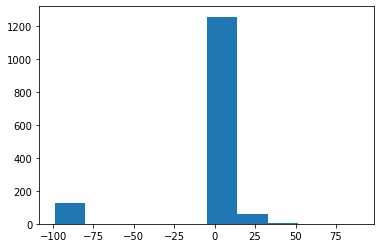

In [9]:
plt.hist(df3['copper'])

In [10]:
df3['copper']= df3['copper'].replace([-99],[0])

(array([1.221e+03, 2.000e+02, 2.000e+01, 2.000e+00, 1.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0.   ,  8.928, 17.856, 26.784, 35.712, 44.64 , 53.568, 62.496,
        71.424, 80.352, 89.28 ]),
 <a list of 10 Patch objects>)

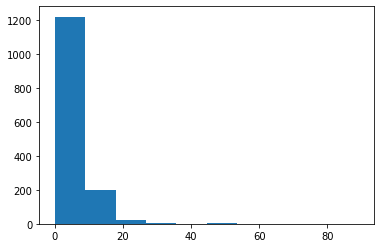

In [11]:
plt.hist(df3['copper'])

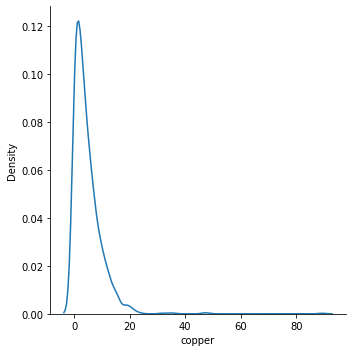

In [12]:
sns.displot(df3, x="copper", kind="kde")

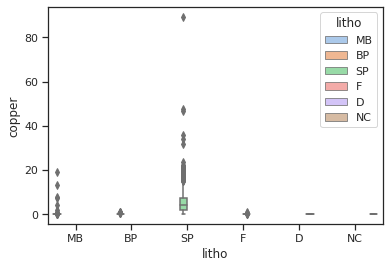

In [13]:
sns.set_theme(style="ticks", palette="pastel")

sns.boxplot(y="copper", x="litho",
            hue="litho",
            data=df3)

In [14]:
df3

,bhid,from,to,gold,copper,litho,X,Y,Z,LENGHT
0,DDFD_A7,16.10,118.36,-99.00,0.00,MB,2127.00,2005.53,1116.966,248.14
1,DDFD_A7,118.36,144.72,-99.00,0.00,BP,2127.00,2005.53,1116.966,248.14
2,DDFD_A7,144.72,145.73,1.55,2.56,SP,2127.00,2005.53,1116.966,248.14
3,DDFD_A7,145.73,146.74,3.93,6.48,SP,2127.00,2005.53,1116.966,248.14
4,DDFD_A7,146.74,147.75,1.37,2.26,SP,2127.00,2005.53,1116.966,248.14
...,...,...,...,...,...,...,...,...,...,...
1442,RCFD_Z2,78.00,79.00,2.06,3.40,SP,2106.89,1821.45,1139.403,85.00
1443,RCFD_Z2,79.00,80.00,2.15,3.55,SP,2106.89,1821.45,1139.403,85.00
1444,RCFD_Z2,80.00,81.00,1.40,2.31,SP,2106.89,1821.45,1139.403,85.00
1445,RCFD_Z2,81.00,82.00,1.59,2.62,SP,2106.89,1821.45,1139.403,85.00


In [18]:
def numeric_label(x):
  if x == 0:
    return "0"
  elif  0.02 < x <= 1.24:
    return "1"
  elif 1.24 <= x <= 3.37:
    return "2"
  elif 3.37 <= x <= 6.72:
    return "3"
  elif x >= 6.72:
    return "4"

In [21]:
df4["Copper_label"] = df4['copper'].apply(numeric_label)

In [23]:
df4.head(25)

,bhid,from,to,gold,copper,litho,X,Y,Z,LENGHT,Copper_label
0,DDFD_A7,16.10,118.36,-99.00,0.00,MB,2127.0,2005.53,1116.966,248.14,0
1,DDFD_A7,118.36,144.72,-99.00,0.00,BP,2127.0,2005.53,1116.966,248.14,0
2,DDFD_A7,144.72,145.73,1.55,2.56,SP,2127.0,2005.53,1116.966,248.14,2
3,DDFD_A7,145.73,146.74,3.93,6.48,SP,2127.0,2005.53,1116.966,248.14,3
4,DDFD_A7,146.74,147.75,1.37,2.26,SP,2127.0,2005.53,1116.966,248.14,2
5,DDFD_A7,147.75,148.76,2.99,4.93,SP,2127.0,2005.53,1116.966,248.14,3
6,DDFD_A7,148.76,149.77,1.65,2.72,SP,2127.0,2005.53,1116.966,248.14,2
7,DDFD_A7,149.77,150.78,1.07,1.77,SP,2127.0,2005.53,1116.966,248.14,2
8,DDFD_A7,150.78,151.79,1.62,2.67,SP,2127.0,2005.53,1116.966,248.14,2
9,DDFD_A7,151.79,152.80,2.69,4.44,SP,2127.0,2005.53,1116.966,248.14,3


In [25]:
fig = px.scatter_3d(df4, x='X', y='Y', z='Z',
              color='Copper_label')
fig.show()